
Shape: (9994, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nu

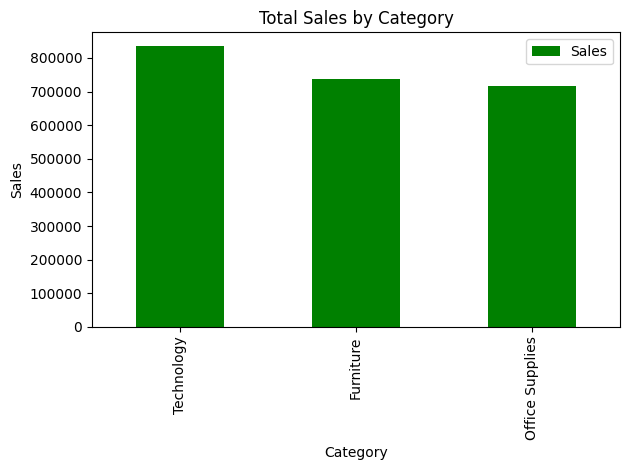

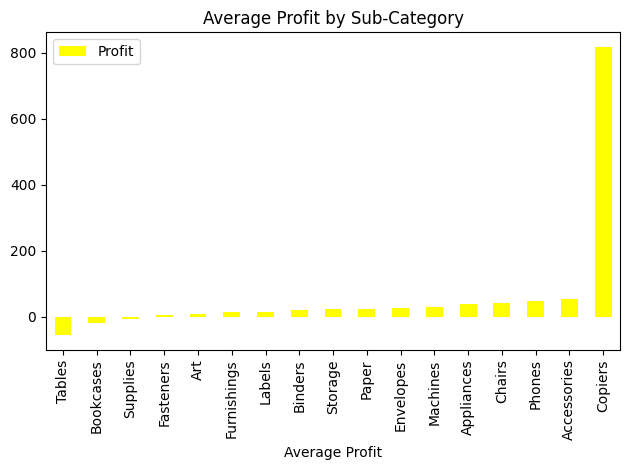

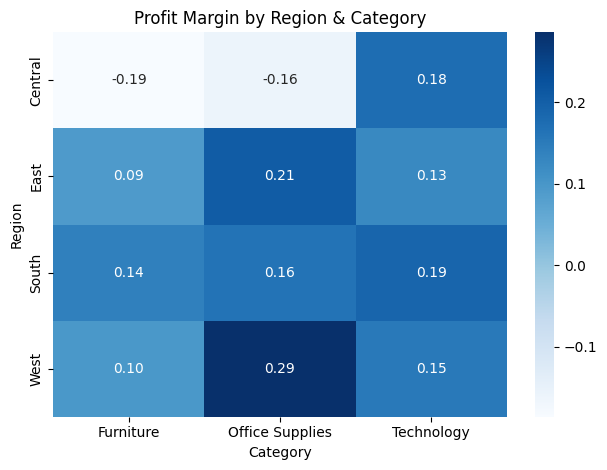

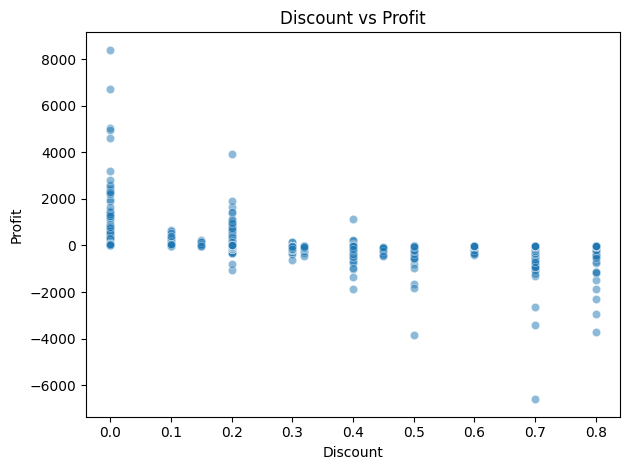

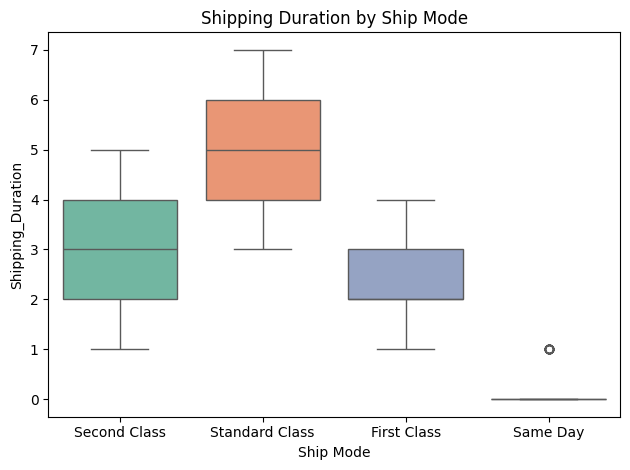

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/riyas/Downloads/Superstore.csv")

# Basic inspections
print("\nShape:",df.shape)
print("\nInfo:")
print(df.info())
print("\nHead:")
print(df.head())
print("\nDescribe:")
print(df.describe())

# Data Cleaning
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:",duplicates)
df = df.drop_duplicates()
print("\nMissing values per column:",df.isnull().sum())
df = df.dropna(subset=["Postal Code"])
print("\nMissing values per column after cleaning:\n", df.isnull().sum())

# Convert data columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Confirm conversion
print(df.dtypes[['Order Date','Ship Date']])

# Creating a new column to extract the year from the Order Date
df["Order_Year"] = df["Order Date"].dt.year
# Calculating the number of days between Order Date and Ship Date to understand shipping delays
df['Shipping_Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
# Creating a new column to calculate Profit Margin (Profit per unit of Sales)
# This helps understand how profitable each order is
df['Profit_Margin'] = df.apply(lambda row: row['Profit'] / row['Sales'] if row['Sales'] > 0 else None, axis=1)

# Grouping by Category, Sub-Category, Region, and Ship Mode
# Aggregating Sales, Profit, Quantity(sum), and Discount, Profit_Margin(mean)
grouped = df.groupby(['Category','Sub-Category', 'Region', 'Ship Mode']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit_Margin': 'mean'

})
print(grouped)

# Identifying top 5 most profitable Sub-Categories
top5_subcat = df.groupby('Sub-Category')['Profit_Margin'].mean().sort_values(ascending=False).head()
print("\nTop 5 Sub-Categories by Profit Margin:")
print(top5_subcat)

# Identifying bottom 5 least profitable Sub-Categories
bottom5_subcat = df.groupby("Sub-Category")['Profit_Margin'].mean().sort_values(ascending=True).head()
print("\nBottom 5 Sub_Categories by Profit Margin:")
print(bottom5_subcat)

# Calculating correlation between Discount and Profit to see if higher discounts reduce profit
corr = df[['Discount','Profit']].corr()
print("\nCorrelation between Discount and Profit:")
print(corr)

# Group by Shipping Duration and calculate average Profit Margin
shipping_profit_trend = df.groupby('Shipping_Duration')['Profit_Margin'].mean()
print("\nShipping Duration v/s Profit Margin:")
print(shipping_profit_trend)

# Bar plot for total sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind= 'bar', color='green')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.tight_layout()
plt.legend()
plt.show()

# Bar plot for average profit by sub-category
subcat_profit = df.groupby('Sub-Category')['Profit'].mean().sort_values()

subcat_profit.plot(kind= 'bar', color='yellow')
plt.title('Average Profit by Sub-Category')
plt.xlabel('Average Profit')
plt.tight_layout()
plt.legend()
plt.show()

# Pivot table for heatmap
pivot_margin = df.pivot_table(values='Profit_Margin', index='Region', columns= 'Category', aggfunc='mean')

sns.heatmap(pivot_margin, annot=True, cmap='Blues', fmt='.2f')
plt.title('Profit Margin by Region & Category')
plt.tight_layout()
plt.show()

# Scatter plot for Discount vs Profit
sns.scatterplot(x= 'Discount', y='Profit', data=df, alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

# Box plot to compare shipping duration across different shipping methods
sns.boxplot(x='Ship Mode', y='Shipping_Duration', hue='Ship Mode', data=df, palette='Set2', legend=False)
plt.title('Shipping Duration by Ship Mode')
plt.tight_layout()
plt.show()





## Business Insights from Superstore Sales Analysis
1. **Technology** is the most profitable category, while **Furniture** yields lower profit margins.
2. **Standard Class** shipping mode has the longest average shipping duration.
3. The **West** region shows the highest average profit margin across all categories.
4. Sub-categories like **Binders** and **Tables** show consistently low average profits, suggesting review of pricing or discount strategy.
5. There is a **negative correlation** between **discount** and **profit**, indicating that excessive discounts harm profitability.
6. Orders with **longer shipping durations (8+ days)** generally show lower profit margins - improving logistics could boost margins.